In [1]:
# pip install scikit-learn
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
from sklearn.neighbors import KNeighborsClassifier as KNN
import pandas as pd

In [2]:
knn = KNN(n_neighbors=5)

In [3]:
mean_1 = [0.0, 0.0]
mean_2 = [3.0, 4.0]
cov_1 = [[0.9, 0.4], [0.3, 0.7]]
cov_2 = [[1.0, 0.1], [0.5, 0.6]]

d1 = np.random.multivariate_normal(mean_1, cov_1, 100)
d2 = np.random.multivariate_normal(mean_2, cov_2, 100)

print d1.shape, d2.shape

(100L, 2L) (100L, 2L)


In [4]:
d = np.zeros((d1.shape[0] + d2.shape[0], d1.shape[1]+1))
d[:d1.shape[0], :2] = d1
d[d1.shape[0]:, :2] = d2
d[d1.shape[0]:, 2] = 1
print d.shape
np.random.shuffle(d)
print d[150:160, 2]

(200L, 3L)
[ 1.  1.  1.  0.  1.  1.  0.  0.  1.  0.]


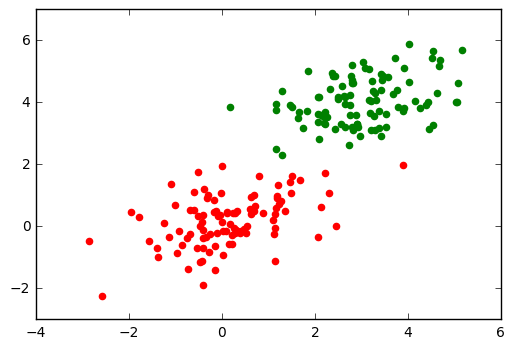

In [10]:
plt.figure(0)
plt.scatter(d1[:, 0], d1[:, 1], color='red')
plt.scatter(d2[:, 0], d2[:, 1], color='green')
plt.show()

In [22]:
split = int(0.75 * d.shape[0])
X_train = d[:split, :2]
X_test = d[split:, :2]
y_train = d[:split, 2]
y_test = d[split:, 2]

print X_train.shape, X_test.shape
print y_train.shape, y_test.shape

(150, 2) (50, 2)
(150,) (50,)


In [30]:
import datetime
start = datetime.datetime.now()
knn.fit(X_train, y_train)
end = datetime.datetime.now()

print end-start

s_ = datetime.datetime.now()
sc = knn.score(X_test, y_test)
e_ = datetime.datetime.now()

print e_-s_
print sc

0:00:00
0:00:00
1.0


In [34]:
pred = knn.predict(X_test)
print pred[:10]
print y_test[:10]

[ 1.  0.  0.  1.  1.  1.  1.  1.  0.  0.]
[ 1.  0.  0.  1.  1.  1.  1.  1.  0.  0.]


In [42]:
ds = pd.read_csv('./Machine Learning Bootcamp/mnist_data/train.csv')
data = ds.values[:5000]
print data.shape

(5000, 785)


In [43]:
split = int(0.80 * data.shape[0])
X_train = data[:split, 1:]
X_test = data[split:, 1:]
y_train = data[:split, 0]
y_test = data[split:, 0]

print X_train.shape, X_test.shape
print y_train.shape, y_test.shape

(4000, 784) (1000, 784)
(4000,) (1000,)


In [44]:
knn = KNN(n_neighbors=7)

start = datetime.datetime.now()
knn.fit(X_train, y_train)
end = datetime.datetime.now()
print "Train time:", end-start

start = datetime.datetime.now()
score = knn.score(X_test, y_test)
end = datetime.datetime.now()
print "Test time:", end-start

pred = knn.predict(X_test)

print "Accuracy:", score*100

Train time: 0:00:00.220000
Test time: 0:00:08.002000
Accuracy: 92.6


8
8
0
5
0
0
3
8
3
1


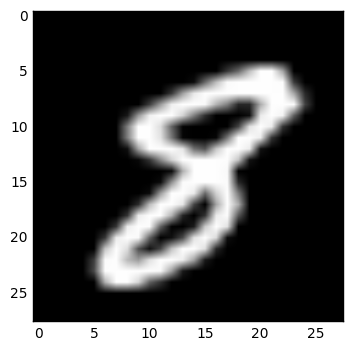

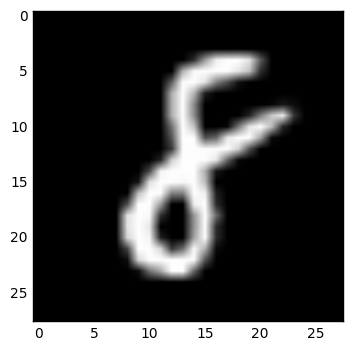

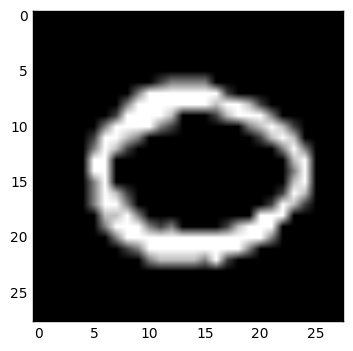

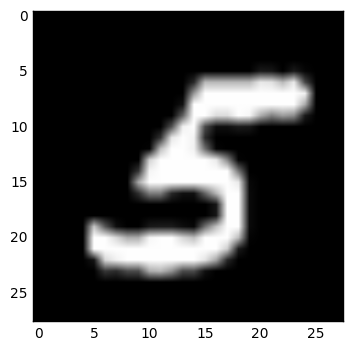

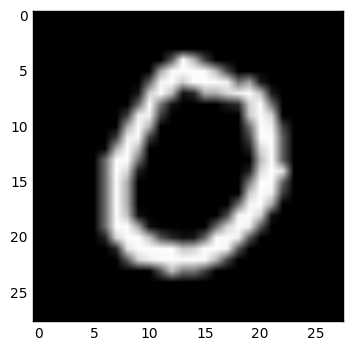

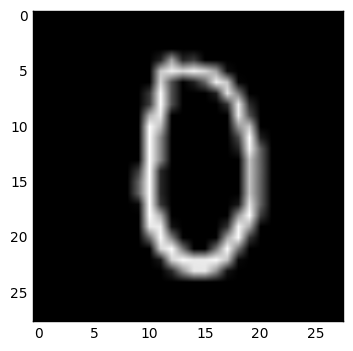

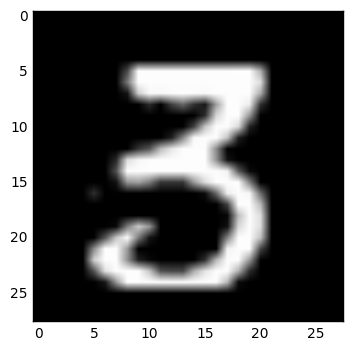

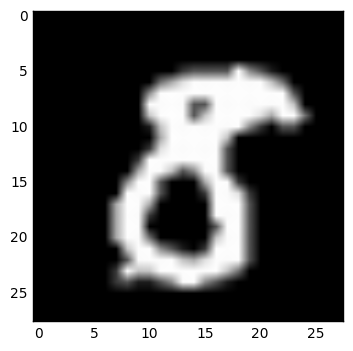

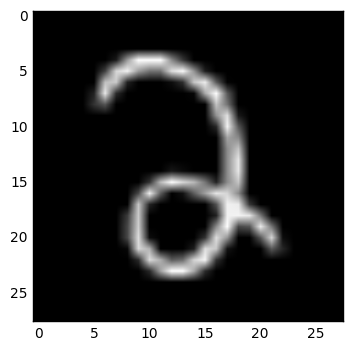

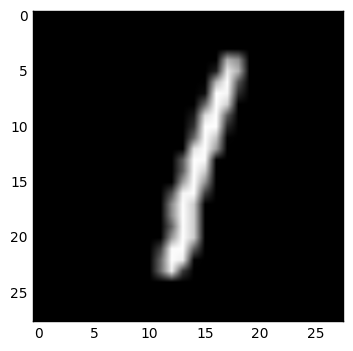

In [47]:
for ix in range(10):
    plt.figure(ix)
    plt.imshow(X_test[ix].reshape((28, 28)), cmap='gray')
    print pred[ix]
plt.show()